<h1 style="color:blue; text-align:center;""> Lecture 35 </h1>
<hr style="height:5px;border-width:0;color:blue;background-color:blue">

# Convolutional Neural Network

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import rmsprop_v2, adam_v2

# from keras.callbacks import ReduceLROnPlateau
# https://keras.io/api/callbacks/reduce_lr_on_plateau/

2023-05-16 12:41:02.469609: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-16 12:41:02.469659: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# ignore warnings
warnings.simplefilter("ignore")

### Data Loading

In [3]:
import os

f = os.walk('MNIST')
for item in f:
    print(item)

('MNIST', [], ['mnist_test.csv', 'mnist_train.csv'])


In [4]:
for dirname, _, filenames in os.walk('MNIST'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

MNIST/mnist_test.csv
MNIST/mnist_train.csv


In [5]:
train=pd.read_csv("MNIST/mnist_train.csv")

In [6]:
print(train.shape)
train.head(10)

(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test=pd.read_csv("MNIST/mnist_test.csv")
print(test.shape)
test.head(10)

(10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train-Test Splits

In [25]:
X_train=train.drop(labels=["label"],axis=1)
Y_train=train["label"]

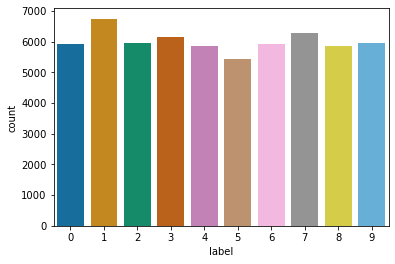

In [26]:
plt.figure()
g=sns.countplot(Y_train,palette="colorblind")

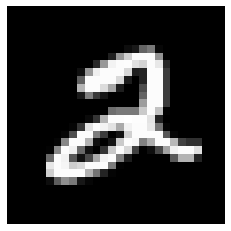

In [27]:
img = X_train.iloc[5].values.reshape(28,28)
img.shape
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.show()

In [28]:
X_train.iloc[5].values.reshape(28,28).shape

(28, 28)

### Normalization

In [29]:
# values before normalizing the data
X_train.iloc[5].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13,
        25, 100, 122,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [30]:
X_test=test.drop(labels=["label"],axis=1)
Y_test=test["label"]

In [31]:
X_train=X_train/255.0
X_test=X_test/255.0
print("X_train: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train:  (60000, 784)
X_test shape:  (10000, 784)


In [34]:
# values after normalizing the data
X_train.iloc[5].values

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Reshape

- Readying for the CNN
- Reshaping to (num_of_examples x width x height x num_of_channels)

In [35]:
# extrating values from pandas dataframe object as numpy array and reshaping it
X_train=X_train.values.reshape(-1,28,28,1) 
X_test=X_test.values.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


### Label Encoding

In [36]:
Y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

In [44]:
type(Y_train)

pandas.core.series.Series

- Both Y_train and Y_test are pandas Series objects
- We need numpy array for one-hot encoding

In [45]:
print(Y_train.values)
print(len(Y_train.values))
print((Y_train.values).shape)

[5 0 4 ... 5 6 8]
60000
(60000,)


In [46]:
# from keras.utils.np_utils import to_categorical
Y_train=to_categorical(Y_train.values,num_classes=10)

In [47]:
Y_train.shape

(60000, 10)

In [48]:
type(Y_train)

numpy.ndarray

In [49]:
Y_test

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

In [50]:
print(Y_test.values)
print(len(Y_test.values))
print((Y_test.values).shape)

[7 2 1 ... 4 5 6]
10000
(10000,)


In [51]:
Y_test=to_categorical(Y_test.values,num_classes=10)

In [52]:
Y_test.shape

(10000, 10)

In [53]:
model = Sequential()

# First Convolutional Layer and Pooling
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second Convolutional Layer and Pooling
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

# Third Convolutional Layer and Pooling
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

# Flattening and Dense Layers for Classification
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

2023-05-16 12:58:13.723956: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-16 12:58:13.724000: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-16 12:58:13.724025: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tron): /proc/driver/nvidia/version does not exist
2023-05-16 12:58:13.724274: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [55]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [56]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [57]:
epochs=1

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=32).history
# Final evaluation of the model
# scores = model.evaluate(X_train, Y_train, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))

2023-05-16 12:58:37.194888: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 52s 27ms/step - loss: 0.2770 - accuracy: 0.9112


Why figure 1875 is appearing in each Epoch ???
- 1875 are total number of batches 
- each batch contains 32 examples
- 1875 * 32 = 60000 examples in the train set

In [58]:
prediction = model.predict(X_test)

In [59]:
prediction[0].shape

(10,)

In [60]:
prediction[0:2]

array([[9.7743982e-09, 9.8583008e-08, 3.2357516e-06, 9.1873392e-07,
        1.6724141e-11, 4.2057186e-10, 2.3749178e-15, 9.9999547e-01,
        1.4654034e-08, 2.6878058e-07],
       [9.7043703e-05, 1.4201466e-03, 9.9842924e-01, 1.8283912e-05,
        2.7659559e-09, 1.1746431e-08, 2.1156295e-07, 6.7831820e-06,
        2.8157476e-05, 2.6624911e-09]], dtype=float32)

In [61]:
prediction.shape

(10000, 10)

* Since, the output is not readable, we round it to be readable

In [62]:
round_to_two_decimal = np.round(prediction, 3) # rounded to 3 decimal places and still getting zeros
round_to_two_decimal[0:2]

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.001, 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
------------------


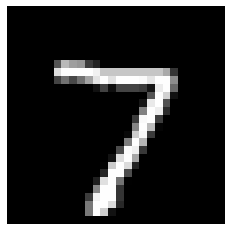

In [73]:
# The first one is predicted as 7 as 8th position is set to 1 rest are 0

# checking in Y_test
print(Y_test[0])
print("------------------")

# checking in X_test
img = X_test[0].reshape(28,28)
img.shape
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.show()



- Our model is so well trained that the probabilities of other classes for this example are very low so much so that they equate to zero when rounded off. Had this not been the case, we would be seeing higher values in the prediction array for each example.
- getting the highest class probability through all the given ones by argmax

In [63]:
prediction = np.argmax(prediction, axis=1)

In [64]:
prediction.shape

(10000,)

In [65]:
prediction[:15]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1])

In [66]:
from sklearn.metrics import classification_report as cr
report = cr(y_true=test["label"].values, y_pred=prediction)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Visualizing Training History 

In [67]:
# !pip install plot-keras-history

(<Figure size 720x360 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

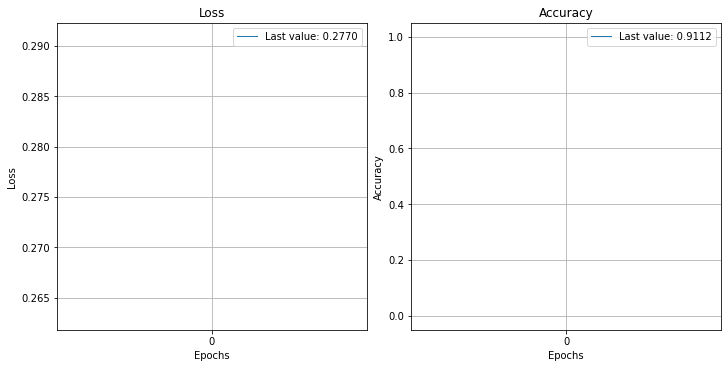

In [68]:
from plot_keras_history import plot_history
import matplotlib.pyplot as plt

# history is a dictionary
history.keys() 

plot_history(history)